In [49]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d.axes3d import Axes3D
from numpy import random, linalg

In [96]:
# DEFINITIONS

# analytic form of the Energy function
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))
# analytic form of the laplacian
def lap_f(x, y):
    return np.cos(np.sqrt(x ** 2 + y ** 2))/np.sqrt(x ** 2 + y ** 2) - np.sin(np.sqrt(x ** 2 + y ** 2))

# Generate "num_points" random points in "dimension" that have uniform
# probability over the unit ball scaled by "radius" (length of points
# are in range [0, "radius"]).
def random_ball(num_points, dimension, radius):
    # First generate random directions by normalizing the length of a
    # vector of random-normal values (these distribute evenly on ball).
    random_directions = random.normal(size=(dimension,num_points))
    random_directions /= linalg.norm(random_directions, axis=0)
    # Second generate a random radius with probability proportional to
    # the surface area of a ball with a given radius.
    random_radii = random.random(num_points) ** (1/dimension)
    # Return the list of random (direction & length) points.
    return radius * (random_directions * random_radii).T

# Compute the average of the points inside the ball
def ball_av(p,av_p,func,N):
    f_av_p = np.zeros(N)
    for i in range(N):
        f_av_p = func(p[0] + av_p[0],p[1] + av_p[1])
    return f_av_p.mean()

# Check the difference between estimation and real laplacian
def check_lap(p,h,N,f):
    n = len(p)
    E_p = f(p[0] , p[1])
    av_p = random_ball(N,n,h)
    mean_ball_p = ball_av(p,av_p,f,N)
    est_lap = (mean_ball_p - E_p)*2*(n+2)/h**2
    true_lap = lap_f(p[0],p[1])
    rel_error = abs((true_lap - est_lap)/true_lap)*100
    print('E(p) = ', E_p)
    print('mean around p = ', mean_ball_p)
    print('Estimated laplacian = ', est_lap)
    print('True laplacian = ', true_lap)
    print('Realtive error (%) = ', rel_error)
    return av_p, E_p

# PARAMETERS

# generate random point
p = np.array([random.uniform(-6,6),random.uniform(-6,6)])

#hyperparameters
N = 2000 # number of points to compute the average
h = 1/2 # radius of the ball

# CHECK THE PERFORMANCE
av_p, E_p = check_lap(p,h,N,f)

E(p) =  0.908269313521497
mean around p =  0.9022553941576164
Estimated laplacian =  -0.19244541964418005
True laplacian =  -1.1172049182379953
Realtive error (%) =  82.77438485074912


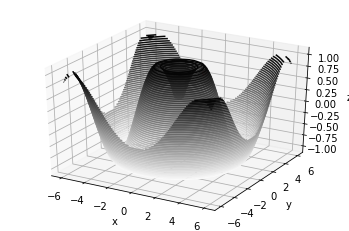

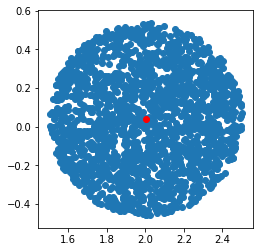

In [97]:
 # PLOT
x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
ax.scatter(p[0] , p[1], E_p, c='r')

fig = plt.figure()
plt.scatter(p[0] + av_p[:,0], p[1] + av_p[:,1])
plt.gca().set_aspect('equal', adjustable='box')
plt.scatter(p[0] , p[1], c='r', alpha=1)


In [120]:
# DEFINITIONS

# analytic form of the Energy function
def f(x, y):
    return x ** 2 + y ** 2
# analytic form of the laplacian
def lap_f(x, y):
    return 4

# generate random point
p = np.array([random.uniform(-6,6),random.uniform(-6,6)])

#hyperparameters
N = 2000 # number of points to compute the average
h = 1/2 # radius of the ball

# CHECK THE PERFORMANCE
av_p, E_p = check_lap(p,h,N,f)

E(p) =  14.323382020304665
mean around p =  15.475840346511298
Estimated laplacian =  36.87866643861224
True laplacian =  4
Realtive error (%) =  821.9666609653061


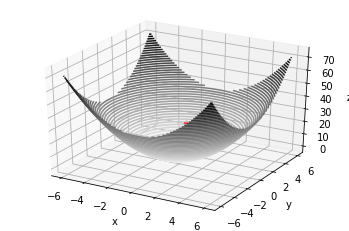

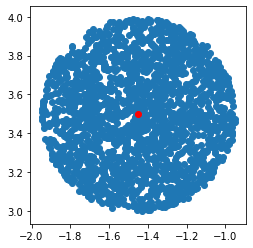

In [121]:
 # PLOT
x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
ax.scatter(p[0] , p[1], E_p, c='r')

fig = plt.figure()
plt.scatter(p[0] + av_p[:,0], p[1] + av_p[:,1])
plt.gca().set_aspect('equal', adjustable='box')
plt.scatter(p[0] , p[1], c='r', alpha=1)
